## Ana CNN

In [5]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [6]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [7]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

In [17]:
ipath  = os.environ['LPRDATADIR']+'cnn/'

type     = 'levels' 
pressure = '5bar'
sbins    = '16x16'
names    = ['esum', 'emax', 'esimple', 'e', 'ez']


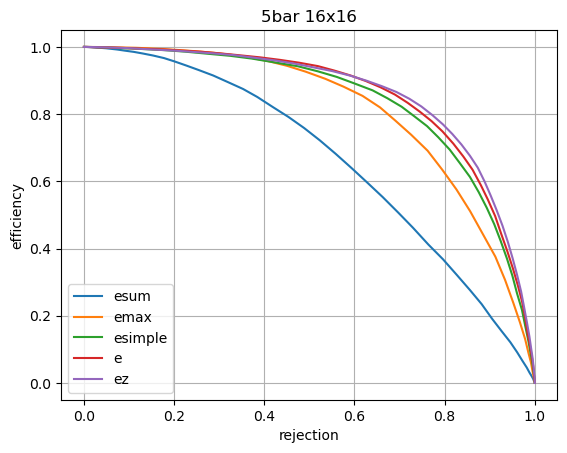

In [18]:
ydir, ypdir  = {}, {}
for name in names:
    ifile = ipath + cnn.cnn_filename(type, pressure, sbins, name)+'.npz'
    cnndata = np.load(ifile)
    ydir[name]  = cnndata['y'] .flatten()
    ypdir[name] = cnndata['yp'].flatten()
    yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
    plt.plot(yr, ys, label = name)
plt.legend()
plt.grid()
plt.xlabel('rejection'); plt.ylabel('efficiency');
plt.title(pressure+' '+sbins);
